# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

([<matplotlib.patches.Wedge at 0x265666363a0>,
 [Text(0.658168074335853, 0.8813709695270404, 'Hispanic'),
  Text(-0.6581680743358529, -0.8813709695270405, 'White not Hispanic')],
 [Text(0.35900076781955614, 0.4807478015602038, '29.6%'),
  Text(-0.3590007678195561, -0.48074780156020386, '70.4%')])

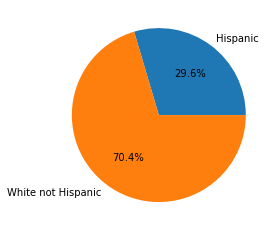

In [1]:
# YOUR CODE HERE
import pandas as pd
df = pd.read_csv("ca_dds_expenditures.csv")
hispExp = df.groupby(["Ethnicity"]).get_group("Hispanic")["Expenditures"].sum()
whiteExp = df.groupby(["Ethnicity"]).get_group("White not Hispanic")["Expenditures"].sum()
yAxis = []
ethn = []
yAxis.append(hispExp)
yAxis.append(whiteExp)
ethn.append("Hispanic")
ethn.append("White not Hispanic")

import matplotlib.pyplot as plt
%matplotlib inline
plt.pie(yAxis,labels=ethn,autopct='%1.1f%%')

**From the pie chart it seems to be the case that White not Hispanc residents are receiving more from the DDS than Hispanic residents**

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

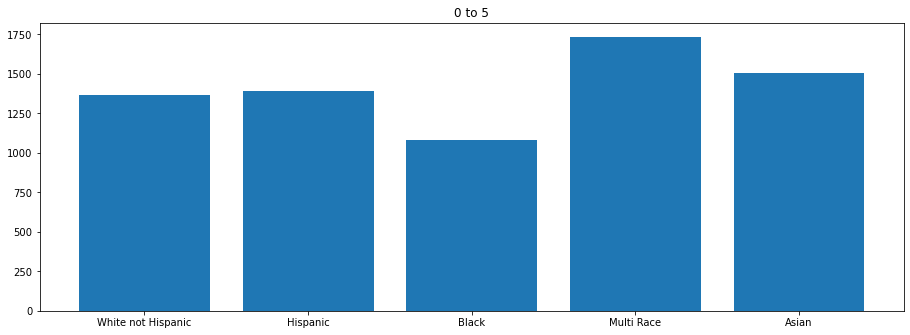

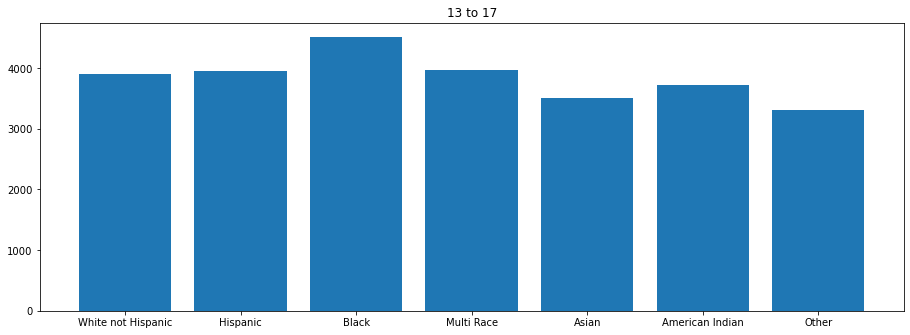

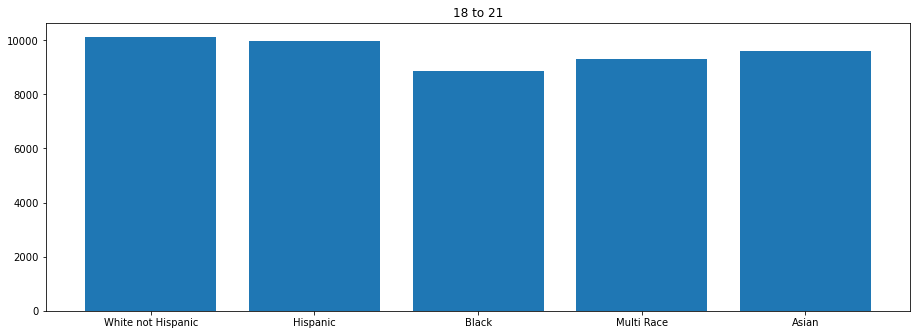

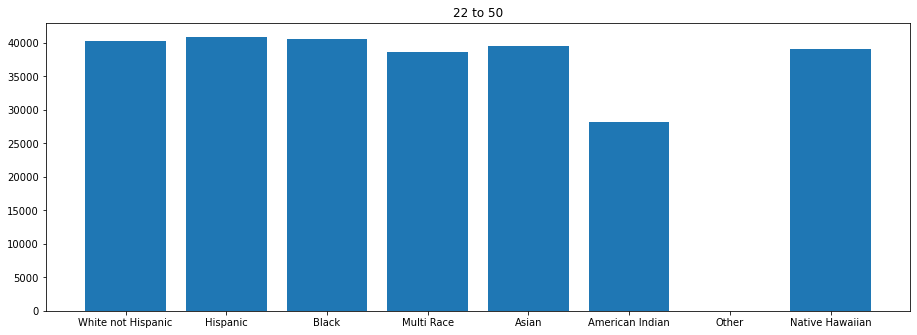

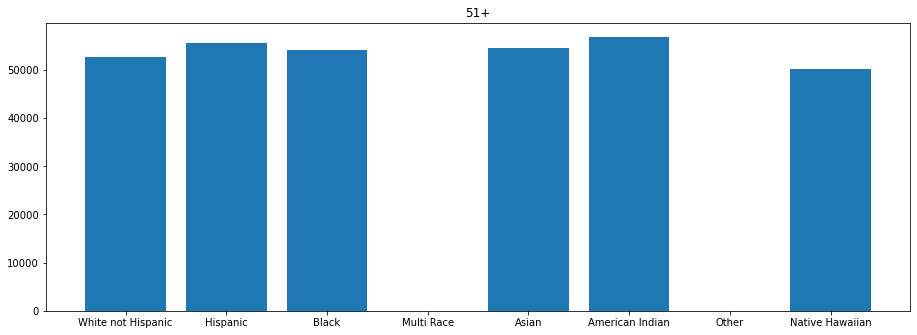

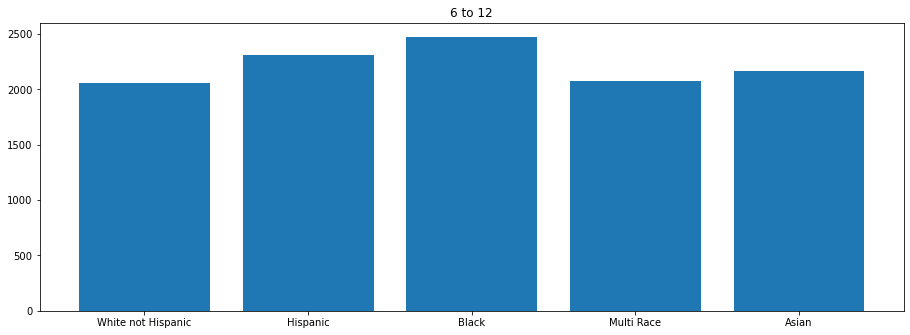

In [13]:
# YOUR CODE HERE
import numpy as np
cohorts = df['Age Cohort'].unique()
cohorts.sort()
ethGroups = df['Ethnicity'].unique()

for cohort in cohorts:
    groupExp = []
    for group in ethGroups:

        exp = df.loc[(df['Ethnicity']==group)&(df['Age Cohort']==cohort), 'Expenditures'].mean()
        #exp = df.groupby(["Age Cohort", "Ethnicity"]).get_group((cohort,group)).sum()
        groupExp.append(exp)
       
    barPlot = plt.figure()
    ax = barPlot.add_axes([0, 0, 2, 1])
    ax.set_title(cohort)
    ax.bar(ethGroups, groupExp)

**It seems it is not always the case that White not Hispanic residents always get more money from the DDS than Hispanic residents. Hispanic residents between the gaes of 0 and 21 seem to get more money than White residents. White residents past the age of 21 get more money than Hispanic residents.**

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

<BarContainer object of 75 artists>

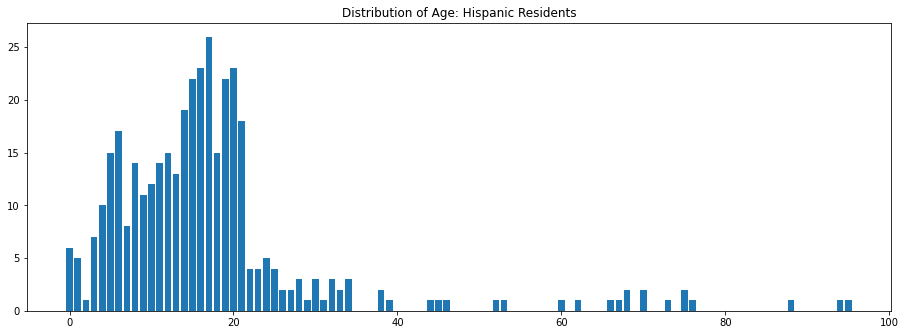

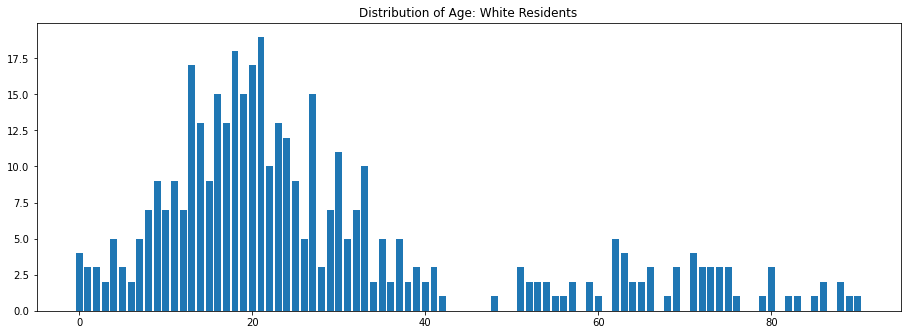

In [3]:
# YOUR CODE HERE (although you may want to add more code cells)
hispAges = df.groupby(["Ethnicity"]).get_group("Hispanic")["Age"].value_counts().index.tolist()
hispAgesCount = df.groupby(["Ethnicity"]).get_group("Hispanic")["Age"].value_counts().tolist()
hispDist = plt.figure()
axHisp = hispDist.add_axes([0, 0, 2, 1])
axHisp.set_title("Distribution of Age: Hispanic Residents")
axHisp.bar(hispAges, hispAgesCount)

whiteAges = df.groupby(["Ethnicity"]).get_group("White not Hispanic")["Age"].value_counts().index.tolist()
whiteAgesCount = df.groupby(["Ethnicity"]).get_group("White not Hispanic")["Age"].value_counts().tolist()
whiteDist = plt.figure()
axWhite = whiteDist.add_axes([0, 0, 2, 1])
axWhite.set_title("Distribution of Age: White Residents")
axWhite.bar(whiteAges, whiteAgesCount)

**From this graph we can see that there are more Hispanic residents that are younger(0-21) and more White residents who are 
older(20+). So in reality it seems like the DDS is giving more to younger Hispanic residents (0-20) because they make up 
the majority of the Hispanic residents. Meanwhile they also gave more to white residents over the age of 20. This could mean
the complaints came from older hispanic residents who thought that they were being discriminated against by getting less help,
which they were getting less help, but that was only because it was going to the majority of younger hispanic residents.**